In [75]:
import sys
from itertools import product

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # 支持向量机
from sklearn.metrics import accuracy_score # 模型评估指标

In [7]:
# 正确显示中文与负号

platform = sys.platform
if "darwin" in platform:
    plt.rcParams['font.family'] = ['Hiragino Sans GB']
else:
    plt.rcParams['font.family'] = ['SimHei']

matplotlib.rcParams['axes.unicode_minus']=False

In [34]:
# 鸢尾花数据集

iris = load_iris()
X = iris.data
y = iris.target

In [35]:
df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
df

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
df.columns = iris.feature_names+['类别']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),类别
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [54]:
X_ = X[:,:2]  #只使用两个特征
y_ = y.copy()

In [56]:
X2 = X_[y_ <2,:] # 只使用两个类别
y2 = y_[y_<2]

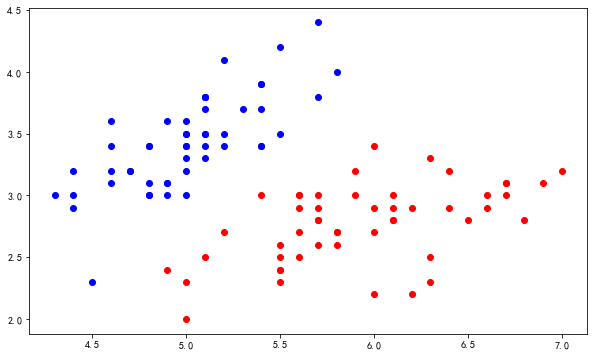

In [58]:
# 数据可视化,用鸢尾花的两个特征作为横纵坐标

plt.figure(figsize=(10,6))

plt.scatter(X2[y2 == 0,0],X2[y2 == 0,1],c = 'blue')
plt.scatter(X2[y2 == 1,0],X2[y2 == 1,1],c = 'red')
plt.show()

### 可以看出来，两个类别可以很容易的绘制出一个决策边界
# 使用支持向量机模型分类

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size = .2,random_state = 0,stratify = y2) # stratify是为了保持split前类的分布。


svm_clf = SVC(kernel='linear') # 实例化模型
svm_clf.fit(X_train,y_train) # 训练模型
y_pred = svm_clf.predict(X_test) # 调用接口，预测

In [71]:
accuracy_score(y_test,y_pred)  # 判断精确性

1.0

## 可视化决策边界

In [72]:
x_min,x_max = np.percentile(X2[:,0],[0,100]) # 通过分位数求最大值与最小值
x_min,x_max

(4.3, 7.0)

In [73]:
x_min,x_max = X2[:,0].min(),X2[:,0].max()
x_min,x_max

(4.3, 7.0)

In [74]:
y_min,y_max = np.percentile(X2[:,1],[0,100])

In [77]:
# 有了两个特征的最大值与最小值，接下来生成网格

[*product([1,2],[3,4])]

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [90]:
# 获取网格点
grid_points = np.array([*product(np.linspace(x_min,x_max,50),np.linspace(y_min,y_max,50))])
grid_points.shape

(2500, 2)

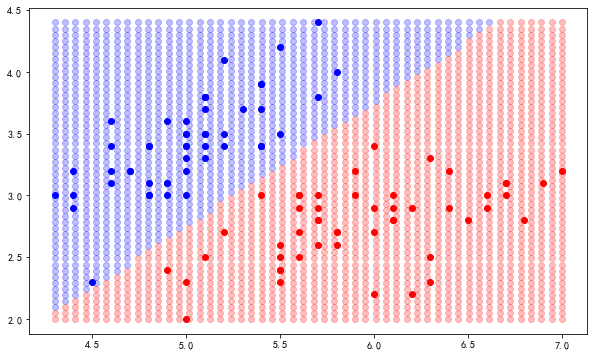

In [93]:
# 网格点对应的分类
grid_preds = svm_clf.predict(grid_points)

# 可视化

plt.figure(figsize=(10,6))

plt.scatter(X2[y2 == 0,0],X2[y2 == 0,1],c = 'blue')
plt.scatter(X2[y2 == 1,0],X2[y2 == 1,1],c = 'red')

plt.scatter(grid_points[grid_preds == 0,0],grid_points[grid_preds == 0,1],c='blue',alpha=.25)
plt.scatter(grid_points[grid_preds == 1,0],grid_points[grid_preds == 1,1],c='red',alpha=.25)

plt.show()

# 优化支持向量机

* sklearn pipeline
* 网格搜索

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit  #用于创建交叉验证模式
from sklearn.model_selection import GridSearchCV

In [150]:
iris = load_iris()
X_w = iris.data[:,:2] #只取两个特征
y_w = iris.target
X = X_w[y_w != 0,:] # 选择类别 1 和 类别 2
y = y_w[y_w != 0]

In [151]:
X.shape

(100, 2)

In [152]:
y.shape

(100,)

In [153]:
X_1 = X[y == 1,:] # 类别为1 的鸢尾花的第一个特征
X_2 = X[y == 2,:]

In [154]:
# 分割训练集与测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 0,stratify = y)

In [157]:
svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC())]) #先标准化数据，再训练模型
svm_est

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [162]:
# 支持向量机的参数
# Cs = [0.001,0.01,0.1,1,10]
# gammas = [0.001,0.01,0.1,1,10]

Cs = np.linspace(0.001,10,100)
gammas = np.linspace(0.001,10,100)

param_grid = dict(svc__gamma = gammas,svc__C = Cs)  #注意是两个下划线
cv = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

grid_cv = GridSearchCV(svm_est,param_grid = param_grid,cv=cv,n_jobs=-1)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e...
       6.061e+00, 6.162e+00, 6.263e+00, 6.364e+00, 6.465e+00, 6.566e+00,
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01])})

In [163]:
grid_cv.best_params_

{'svc__C': 2.728, 'svc__gamma': 0.506}

In [164]:
grid_cv.best_score_

0.725